In [1]:
import numpy as np

In [2]:
num_objects = 2

In [90]:
true_motion_parameters = [{"loc_0": (1.3, 1.0), "vel": (0.1,-0.8)},
                          {"loc_0": (1.1, -1.3), "vel": (0.1,0.8)}]

In [91]:
observed_parameters = [{"color": "red", "err": 0.025},
                       {"color": "blue", "err": 0.050}]
n_obs = 500

In [92]:
%matplotlib inline
import matplotlib.pyplot as plt

In [93]:
np.random.seed(42)
s = np.random.standard_cauchy(n_obs) + np.random.normal(scale=0.05,size=n_obs)
s = (s[(s>0) & (s<50)] + 1)
delta_time = s
times = delta_time.cumsum()
times[:10]

array([  1.47149488,   3.47454651,   6.49998095,   8.51469084,
        12.61412876,  14.23030525,  17.37624489,  22.71162391,
        24.06702016,  27.11974962])

In [94]:
true_positions = []
obs_positions = []
for obj, obs in zip(true_motion_parameters,observed_parameters):
    x = times*obj["vel"][0]/365.25 + obj["loc_0"][0]
    y = times*obj["vel"][1]/365.25 + obj["loc_0"][1]
    true_positions.append((x,y))
    obs_positions.append((x + np.random.normal(scale=obs["err"],size=len(times)),y + np.random.normal(scale=obs["err"],size=len(times))))

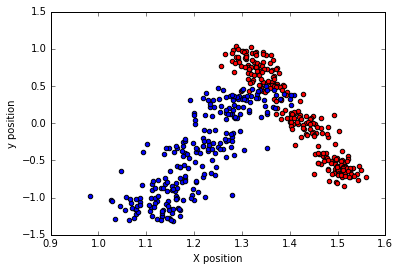

In [95]:
plt.scatter(obs_positions[0][0], obs_positions[0][1],c=observed_parameters[0]["color"])
plt.scatter(obs_positions[1][0], obs_positions[1][1],c=observed_parameters[1]["color"])
plt.xlabel("X position")
plt.ylabel("y position")

In [97]:
import pandas as pd

In [105]:
df = pd.DataFrame()

In [113]:
df["red_pos_X"] = obs_positions[0][0]
df["red_pos_Y"] = obs_positions[0][1]
df["blue_pos_X"] = obs_positions[1][0]
df["blue_pos_Y"] = obs_positions[1][1]
df["t"] = times
df = df.set_index("t")

In [114]:
df.to_csv("location_data_hw8.csv",index_label="t")

In [115]:
!head location_data_hw8.csv

t,red_pos_X,red_pos_Y,blue_pos_X,blue_pos_Y
1.4714948760493265,1.3198619002446312,1.0205347030756173,1.156608509339766,-1.3202791206642532
3.474546514932861,1.2871716360828702,1.0351551023858794,1.1483276020972264,-1.2790958565887287
6.4999809511411915,1.281324625710785,0.9831519871658227,1.0631357144051623,-1.3075992044312892
8.514690837655818,1.3022468338659323,0.9771298945105997,1.122683809657433,-1.2846570683216414
12.614128760485363,1.299198944672465,0.9741228221931251,1.054870723508524,-1.1673854286569698
14.230305253671522,1.2925653440108078,0.9978785956132891,1.034915137004543,-1.2811829230853842
17.37624489044795,1.3221670427614893,0.9387573190446651,1.0734214953455732,-1.2798581550004906
22.711623910316302,1.3301007339542537,0.9562143946484434,1.149337777359129,-1.2826322603618319
24.06702015549202,1.3087993631649602,0.9716664126832504,1.1542454432764684,-1.2100768733636929
